In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras import layers, models, Model
from tensorflow import keras

In [2]:
import os
for dirname,_,filenames in os.walk('/Dataset/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
train_directory = r"C://Users//Chaitu//Desktop//Intelligent Systems//Dataset//fruits-360//Training//"
test_directory = r"C://Users//Chaitu//Desktop//Intelligent Systems//Dataset//fruits-360//Test//"
validation_directory=r"C://Users/Chaitu/Desktop/Intelligent Systems/Dataset/fruits-360/test-multiple_fruits"

In [4]:
class_names_train = os.listdir(train_directory)
number_of_classes_train = len(os.listdir(train_directory))
print(class_names_train)
number_of_images_train = 0
for class_name_train in class_names_train:
    class_path = os.path.join(train_directory, class_name_train)
    number_of_images_train += len(os.listdir(class_path))

print("Number of images Train: ", number_of_images_train)
print("Number of classes Train: ",number_of_classes_train)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [5]:
class_names_test = os.listdir(test_directory)
number_of_classes_test = len(os.listdir(test_directory))
print(class_names_test)
number_of_images_test = 0
for class_name_test in class_names_test:
    class_path = os.path.join(test_directory, class_name_test)
    number_of_images_test += len(os.listdir(class_path))

print("Number of images test: ", number_of_images_test)
print("Number of classes test: ",number_of_classes_test)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [6]:
class_names_valid = os.listdir(validation_directory)
number_of_classes_valid = len(os.listdir(validation_directory))
print(class_names_valid)
number_of_images_valid = 0
for class_name_valid in class_names_valid:
    class_path = os.path.join(validation_directory, class_name_valid)
    number_of_images_valid += len(os.listdir(class_path))

print("Number of images valid: ", number_of_images_valid)
print("Number of classes valid: ",number_of_classes_valid)

['apples', 'apricot', 'bananas', 'blueberries', 'Cactus', 'cherries', 'coconut', 'dates', 'grapes', 'kiwi', 'limes', 'lychee', 'mandarine', 'mangoes', 'oranges', 'peaches', 'pears', 'permason', 'physalis', 'plum', 'pomegranate', 'raspberry', 'salak', 'strawberries', 'tomatoes']
Number of images valid:  120
Number of classes valid:  25


In [7]:
print("Number of images Train: ", number_of_images_train)
print("Number of classes Train: ",number_of_classes_train)

Number of images Train:  67692
Number of classes Train:  131


In [8]:
print("Number of images test: ", number_of_images_test)
print("Number of classes test: ",number_of_classes_test)

Number of images test:  22688
Number of classes test:  131


In [9]:
print("Number of images valid: ", number_of_images_valid)
print("Number of classes valid: ",number_of_classes_valid)

Number of images valid:  120
Number of classes valid:  25


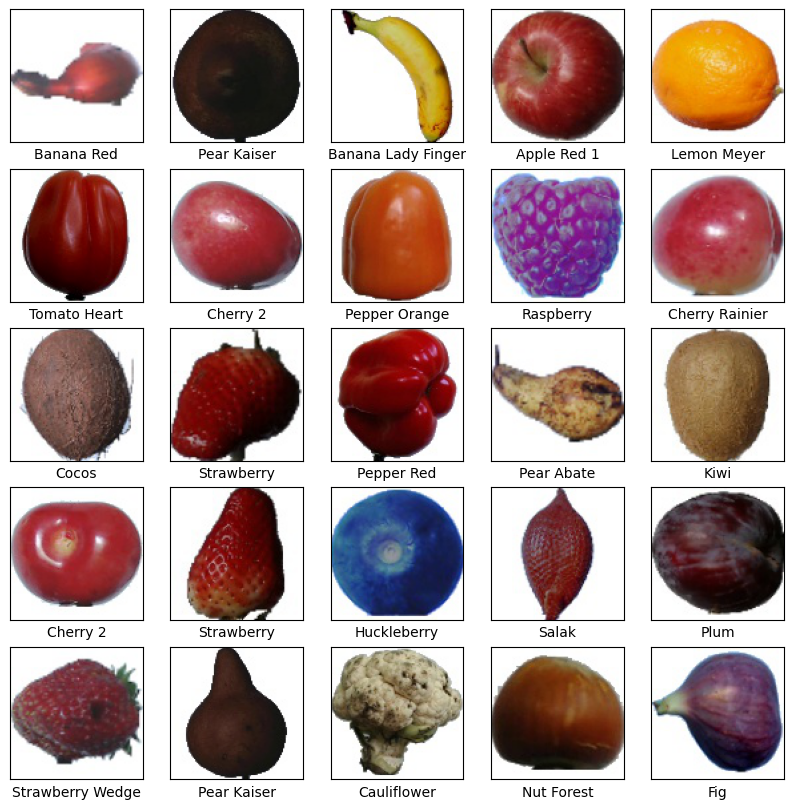

In [10]:
import random 
plt.figure(figsize=(10, 10))
for i in range(25):
    class_name_train = random.choice(class_names_train)
    class_dir = os.path.join(train_directory, class_name_train)
    file_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, file_name)
    image = plt.imread(image_path)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.xlabel(class_name_train)

plt.show()

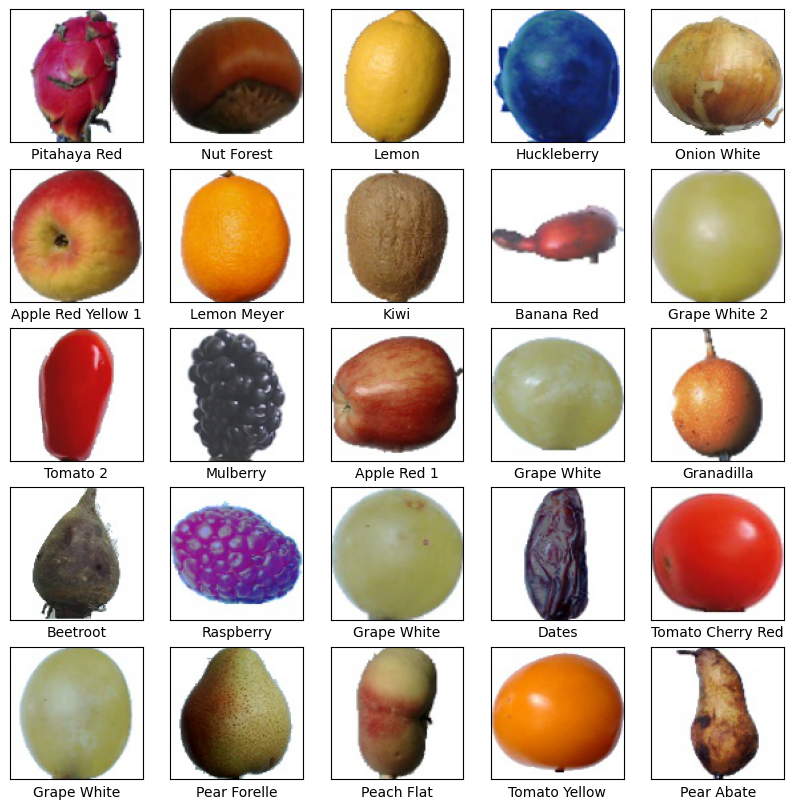

In [11]:
import random 
plt.figure(figsize=(10, 10))
for i in range(25):
    class_name_test = random.choice(class_names_test)
    class_dir = os.path.join(test_directory, class_name_test)
    file_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, file_name)
    image = plt.imread(image_path)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.xlabel(class_name_test)

plt.show()

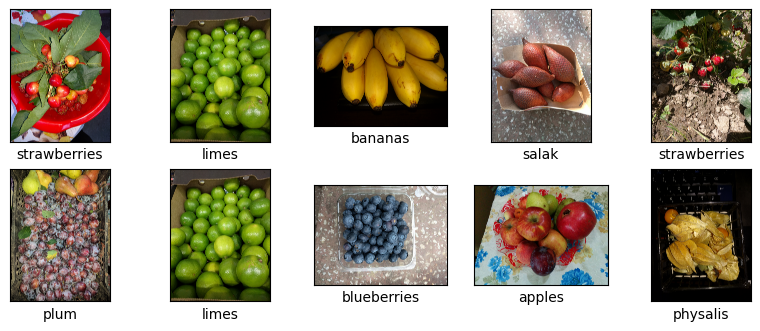

In [12]:
import random 
plt.figure(figsize=(10, 10))
for i in range(10):
    class_name_valid = random.choice(class_names_valid)
    class_dir = os.path.join(validation_directory, class_name_valid)
    file_name = random.choice(os.listdir(class_dir))
    image_path = os.path.join(class_dir, file_name)
    image = plt.imread(image_path)
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image)
    plt.xlabel(class_name_valid)

plt.show()

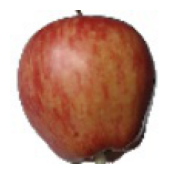

In [13]:
train_img=load_img(train_directory+"Apple Red 1//1_100.jpg")
plt.figure(figsize=(2,2))
plt.imshow(train_img)
plt.axis("off")
plt.show()

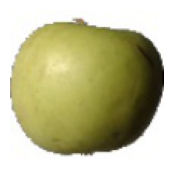

In [14]:
test_img = load_img(test_directory+"Apple Golden 3//3_100.jpg")
plt.figure(figsize = (2,2))
plt.imshow(test_img)
plt.axis("off")
plt.show()

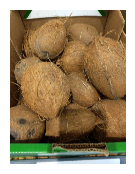

In [15]:
validation_img = load_img(validation_directory+"/coconut/cocos.jpg")
plt.figure(figsize = (2,2))
plt.imshow(validation_img)
plt.axis("off")
plt.show()

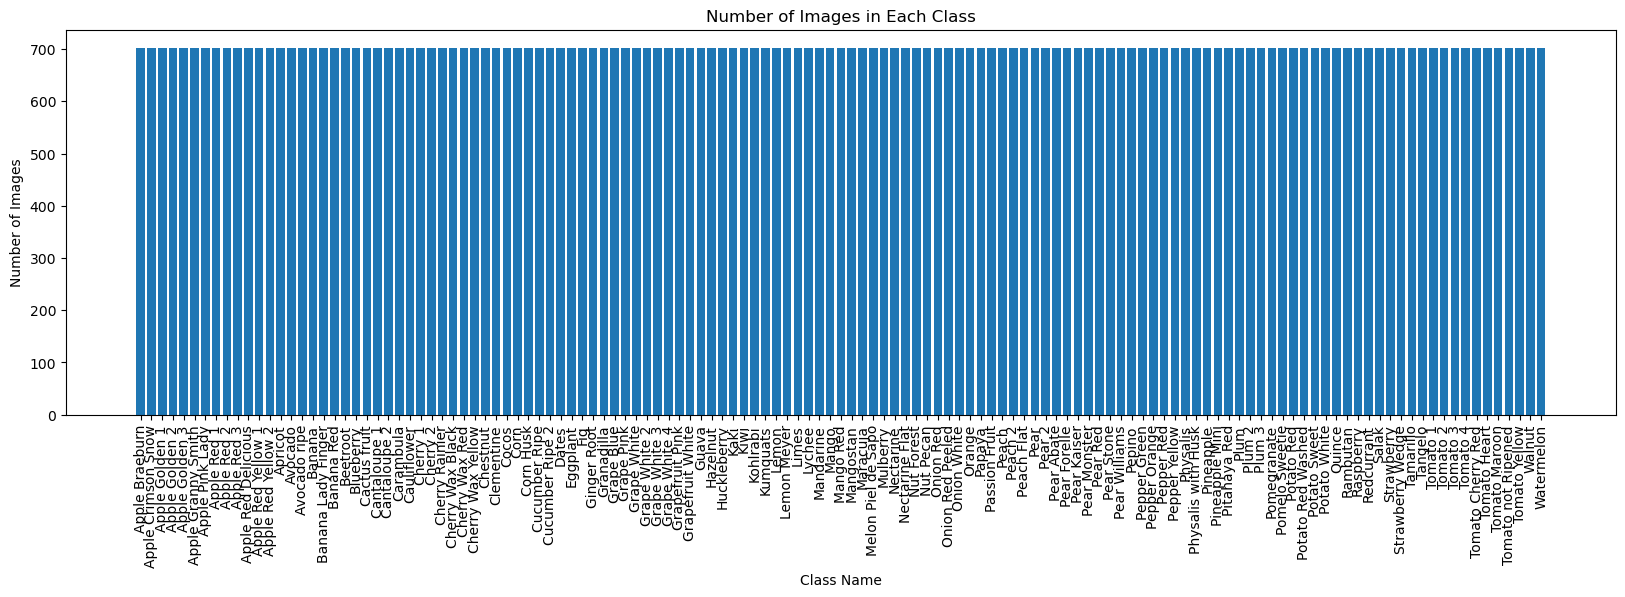

In [16]:
image_counts = []
for class_name in class_names_train:
    class_dir = os.path.join(train_directory, class_name_train)
    image_count = len(os.listdir(class_dir))
    image_counts.append(image_count)

# Plot the bar chart
plt.figure(figsize=(20, 5))
plt.bar(class_names_train, image_counts)
plt.xticks(rotation=90)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number of Images in Each Class")
plt.show()

In [17]:
train_fruits_name = []
train_fruits_image_name = []
for i in os.listdir(train_directory):
    for train_image_filename in os.listdir(train_directory+i):
        train_fruits_name.append(i)
        train_fruits_image_name.append(train_image_filename)

In [18]:
x_train = img_to_array(train_img)
print(x_train.shape)

(100, 100, 3)


In [19]:
x_test = img_to_array(test_img)
print(x_test.shape)

(100, 100, 3)


In [20]:
x_valid = img_to_array(validation_img)
print(x_valid.shape)

(4032, 3024, 3)


In [21]:
model = Sequential()
img_width = 100
img_height = 100

test_datagen = ImageDataGenerator(rescale = 1./255)

model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(number_of_classes_train, activation = 'softmax'))

model.compile(loss = "categorical_crossentropy",optimizer = "rmsprop",metrics = ["accuracy"])


C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [22]:
train_data_generater = ImageDataGenerator(rescale = 1./255,
                   shear_range = 0.3,
                   horizontal_flip = True,
                   zoom_range = 0.3,  
                   
)

test_data_generator = ImageDataGenerator(rescale = 1./255)

In [23]:
batch_size = 32

In [24]:
train_Generator = train_data_generater.flow_from_directory(train_directory,
                                                           target_size = x_train.shape[:2],
                                                          batch_size = batch_size,
                                                          color_mode = "rgb",
                                                          class_mode = "categorical")
test_Generator = test_datagen.flow_from_directory(test_directory,
                                                  target_size = x_test.shape[:2],
                                                    batch_size = batch_size,
                                                    color_mode = "rgb",
                                                    class_mode = "categorical")
history = model.fit(
    train_Generator,
    steps_per_epoch = 1800 // batch_size,
    epochs = 60,
    validation_data = test_Generator,
    validation_steps = 900 // batch_size
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/60


C:\Users\Chaitu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 180ms/step - accuracy: 0.0156 - loss: 4.8211 - val_accuracy: 0.0312 - val_loss: 4.3468
Epoch 2/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 168ms/step - accuracy: 0.0627 - loss: 4.1630 - val_accuracy: 0.1384 - val_loss: 3.3784
Epoch 3/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 165ms/step - accuracy: 0.1361 - loss: 3.2905 - val_accuracy: 0.2031 - val_loss: 2.9177
Epoch 4/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.2433 - loss: 2.7045 - val_accuracy: 0.3158 - val_loss: 2.3751
Epoch 5/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.3666 - loss: 2.2226 - val_accuracy: 0.4855 - val_loss: 1.6786
Epoch 6/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.4566 - loss: 1.8486 - val_accuracy: 0.5580 - val_loss: 1.4183
Epoch 7/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 164ms/step - accuracy: 0.5614 - loss: 1.4870 - val_accuracy: 0.5647 - val_loss: 1.4304
Epoch 8/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.6248 - loss: 1.2592 - val_accuracy: 0.6696 - val

C:\Users\Chaitu\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 173ms/step - accuracy: 0.9114 - loss: 0.2462 - val_accuracy: 0.9174 - val_loss: 0.2385
Epoch 28/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 163ms/step - accuracy: 0.9124 - loss: 0.2844 - val_accuracy: 0.9051 - val_loss: 0.3607
Epoch 29/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 166ms/step - accuracy: 0.9279 - loss: 0.2141 - val_accuracy: 0.8884 - val_loss: 0.4316
Epoch 30/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9346 - loss: 0.2164 - val_accuracy: 0.9275 - val_loss: 0.2127
Epoch 31/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 162ms/step - accuracy: 0.9051 - loss: 0.2927 - val_accuracy: 0.8973 - val_loss: 0.3631
Epoch 32/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - accuracy: 0.9130 - loss: 0.2831 - val_accuracy: 0.9107 - val_loss: 0.3095
Epoch 33/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 158ms/step - accuracy: 0.9301 - loss: 0.2058 - val_accuracy: 0.9475 - val_loss: 0.2201
Epoch 34/60
56/56 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.9363 - loss: 0.2069 - val_accuracy: 0.939

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 131)                 │          16,899 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,497,352 (13.34 MB)

 Trainable params: 1,748,675 (6.67 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,748,677 (6.67 MB)

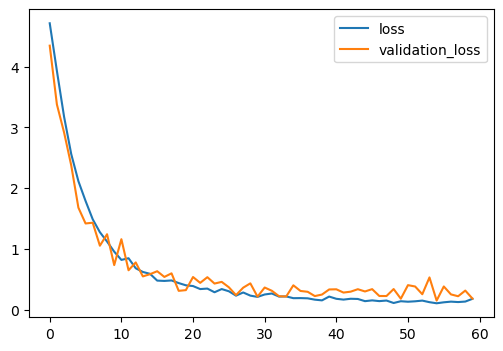

In [26]:
plt.figure(figsize = (6,4))
plt.plot(history.history["loss"],label = "loss")
plt.plot(history.history["val_loss"],label = "validation_loss")
plt.legend()
plt.show()

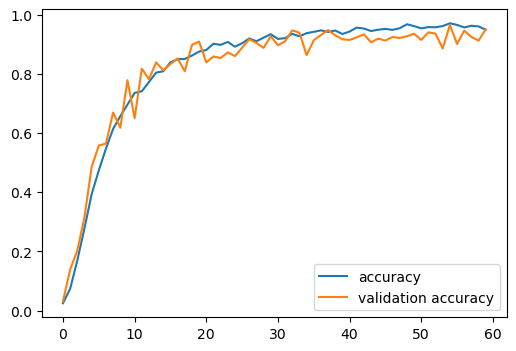

In [27]:
plt.figure(figsize = (6,4))
plt.plot(history.history["accuracy"],label = "accuracy")
plt.plot(history.history["val_accuracy"],label = "validation accuracy")
plt.legend()
plt.show()

In [28]:
# Save the trained model
model.save('fruit_classification_model_CNN.h5')

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import models  
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import decode_predictions

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [30]:
train_dir_path = r"C://Users//Chaitu//Desktop//Intelligent Systems//Dataset//fruits-360//Training//"
test_dir_path = r"C://Users//Chaitu//Desktop//Intelligent Systems//Dataset//fruits-360//Test//"
validation_dir_path = r"C://Users//Chaitu//Desktop//Intelligent Systems//Dataset//fruits-360//test-multiple_fruits//"

In [52]:
mobile_net_InputSize = (224,224)

In [53]:
def getAllClassNames(dir_path):
    return os.listdir(dir_path)

In [33]:
def understandData(train_dir_path, test_dir_path):
    for dir_path, name in [(train_dir_path, "Train"), (test_dir_path, "Test")]:
        print(f"Summary for {name} Data:")
        all_class_names = os.listdir(dir_path)
        print('Number of Classes:', len(all_class_names))
        print('CLASS NAME\tNUMBER OF IMAGES')
        for class_name in all_class_names:
            class_count = len(os.listdir(os.path.join(dir_path, class_name)))
            print(f"{class_name}\t{class_count}")

In [54]:
def readData(train_dir_path, test_dir_path):
    nb_of_train_files = sum(len(files) for _, _, files in os.walk(train_dir_path))
    nb_of_test_files = sum(len(files) for _, _, files in os.walk(test_dir_path))
    print('Number of train samples:', nb_of_train_files)
    print('Number of test samples:', nb_of_test_files)

In [35]:
AllClassNames = getAllClassNames(train_dir_path)
num_of_classes = len(AllClassNames)
DictOfClasses = {i: AllClassNames[i] for i in range(len(AllClassNames))}

In [ ]:
plt.figure(figsize=(15, 10))
for images, labels in train_directory_dataset.take(1):
    for i in range(9):
        augmented_image = data_augmentation(images)
        plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title("Class: " + class_names[labels[0]])
        plt.axis("off")
plt.show()

In [36]:
conv_base = MobileNetV2(weights = 'imagenet', include_top=False, pooling='avg')
conv_base.trainable = False

C:\Users\Chaitu\AppData\Local\Temp\ipykernel_21580\631541025.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNetV2(weights = 'imagenet', include_top=False, pooling='avg')


In [37]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dropout(0.5),
    layers.Dense(num_of_classes, activation = 'softmax')
])

In [38]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = layers.Dense(131, activation='softmax')(x)
model = models.Model(inputs=base_model.input, outputs=predictions)

In [61]:
optimizer = Adam(learning_rate=0.0001, decay=0.0001)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.4, 
    zoom_range = 0.2, 
    rotation_range = 50,
    width_shift_range = 0.2,
    height_shift_range = 0.2, 
    horizontal_flip = True, 
    fill_mode = 'nearest'
)

train_generator = datagen.flow_from_directory(
    train_dir_path,
    target_size = mobile_net_InputSize,
    batch_size = 32,
    class_mode = 'categorical'
)
test_generator = datagen.flow_from_directory(
    test_dir_path,
    target_size = mobile_net_InputSize,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [63]:
# Fit the model
history = model.fit(train_generator, epochs = 4, validation_data = test_generator, verbose = 1)

Epoch 1/4
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 4731s 2s/step - accuracy: 0.9756 - loss: 0.0925 - val_accuracy: 0.9712 - val_loss: 0.1003
Epoch 2/4
2116/2116 ━━━━━━━━━━━━━━━━━━━━ 5067s 2s/step - accuracy: 0.9928 - loss: 0.0256 - val_accuracy: 0.9762 - val_loss: 0.0951
Epoch 3/4
 452/2116 ━━━━━━━━━━━━━━━━━━━━ 1:04:23 2s/step - accuracy: 0.9919 - loss: 0.0281

KeyboardInterrupt: 

In [51]:
model.save('mobilenet.keras')

In [ ]:
model

In [ ]:
# Main execution
if __name__ == "__main__":
    understandData(train_dir_path, test_dir_path)
    readData(train_dir_path, test_dir_path)
    # Additional functions like displaySampleImages, predictFruitClass, etc., can be integrated similarly
